<a href="https://colab.research.google.com/github/Sewanmpm/SlumImprovment/blob/main/sevan_vector_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install numpy matplotlib opencv-python-headless scikit-image pyshp


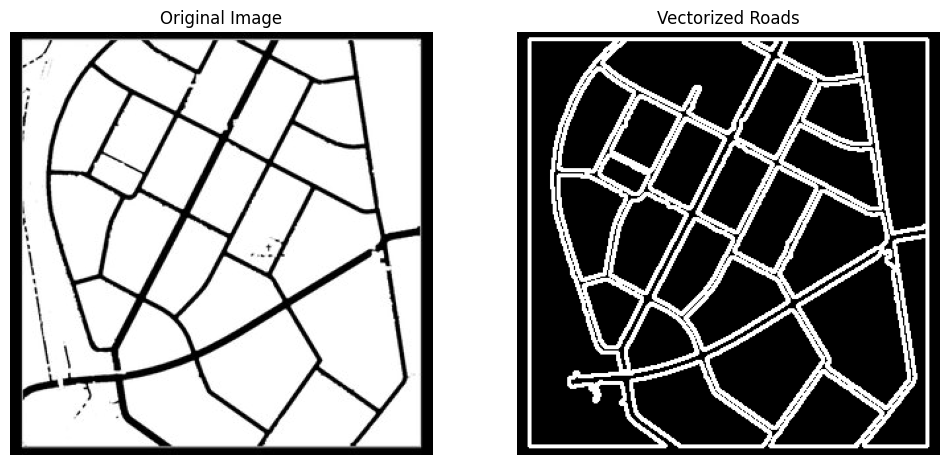

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the black and white image
image_path = '/root/Road-and-building-masks-extracted-from-OSM_Q320.jpg'  # Update this with your image path
bw_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded
if bw_image is None:
    raise Exception("Image not loaded. Check the file path.")

# Invert the image if necessary (if your roads are black and background is white)
# Remove this line if your roads are already white
bw_image = cv2.bitwise_not(bw_image)

# Threshold the image to make sure it is binary
_, binary_image = cv2.threshold(bw_image, 127, 255, cv2.THRESH_BINARY)

# Find contours (vectorized shapes) in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create an empty image to draw contours
contour_image = np.zeros_like(bw_image)

# Draw the contours - change color to white and increase thickness
cv2.drawContours(contour_image, contours, -1, (255, 255, 255), 2)  # Increase thickness here

# Plot the original image and the image with contours
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(bw_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(contour_image, cmap='gray')
plt.title('Vectorized Roads')
plt.axis('off')

plt.show()


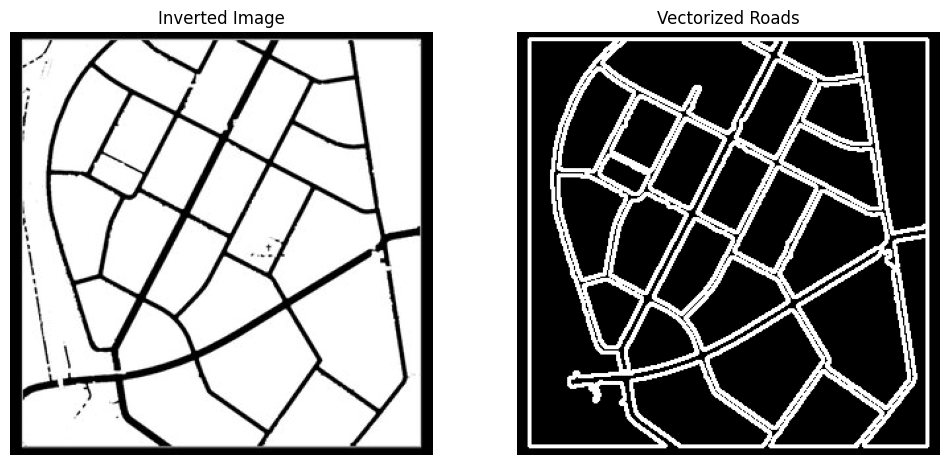

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def invert_colors(image):
    """Inverts the colors of a black and white image."""
    return cv2.bitwise_not(image)

# Load the black and white image
image_path = '/root/Road-and-building-masks-extracted-from-OSM_Q320.jpg'  # Update this with your image path
bw_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded
if bw_image is None:
    raise Exception("Image not loaded. Check the file path.")

# Invert the image colors (black to white, white to black)
bw_image = invert_colors(bw_image)

# Threshold the image to make sure it is binary
_, binary_image = cv2.threshold(bw_image, 127, 255, cv2.THRESH_BINARY)

# Find contours (vectorized shapes) in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create an empty image to draw contours
contour_image = np.zeros_like(bw_image)

# Draw the contours - change color to white and increase thickness
cv2.drawContours(contour_image, contours, -1, (255, 255, 255), 2)  # Increase thickness here

# Plot the original image and the image with contours
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(bw_image, cmap='gray')
plt.title('Inverted Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(contour_image, cmap='gray')
plt.title('Vectorized Roads')
plt.axis('off')

plt.show()


In [8]:
pip install pyshp


In [9]:
import shapefile

# Function to write contours to a Shapefile
def write_contours_to_shapefile(contours, shapefile_path):
    # Create a polygon shapefile
    with shapefile.Writer(shapefile_path, shapeType=shapefile.POLYLINE) as shp:
        shp.field('ID', 'N')  # Add 'ID' field for contour identifier
        for i, contour in enumerate(contours):
            # Convert contour points to a format suitable for the shapefile
            points = [(x, y) for [[x, y]] in contour]
            shp.line([points])  # Create a line feature from contour points
            shp.record(i)  # Record with contour ID

# Specify your Shapefile path (without the file extension)
shapefile_path = 'vectored_roads'  # Update this with your desired base file path

# Call the function with the contours you obtained
write_contours_to_shapefile(contours, shapefile_path)


In [13]:
# Specify your desired directory path
directory_path = "/root"  # Update this with your actual directory path
shapefile_name = 'vectored_roads'  # Name of the shapefile
shapefile_path = f'{directory_path}/{shapefile_name}'  # Construct full file path

# Function call remains the same
write_contours_to_shapefile(contours, shapefile_path)


In [14]:
pip install svgwrite

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 1.7 MB/s eta 0:00:00


In [38]:
import cv2
import numpy as np
import svgwrite
import sys

# Check if the user provided an output path as a command-line argument
if len(sys.argv) > 1:
    output_path = sys.argv[1]
else:
    print("No output file path provided, using default 'vectored_roads.svg'.")
    output_path = 'vectored_roads.svg'  # Default file path

# Ensure the following function (or any function) is correctly indented
def write_contours_to_svg(contours, svg_file_path):
    # Make sure the code here is indented
    max_x, max_y = 0, 0
    for contour in contours:
        # Further indentation for nested loops or conditionals
        for [[x, y]] in contour:
            max_x, max_y = max(x, max_x), max(y, max_y)

    # Continue with properly indented lines for the entire block of the function
    svg_size = (str(max_x) + 'px', str(max_y) + 'px')
    dwg = svgwrite.Drawing(svg_file_path, size=svg_size)
    ...


    # 'dwg' should be used after definition and within the same function
    for contour in contours:
        points = [(int(x), int(y)) for [[x, y]] in contour]
        if points:  # ensuring there are points to create a polygon
            dwg.add(dwg.polygon(points, fill='none', stroke='black'))

    # The 'dwg.save()' should also be within the same scope where 'dwg' is defined
    dwg.save()


# Load the black and white image
image_path = '/root/Road-and-building-masks-extracted-from-OSM_Q320.jpg'  # Update this with your image path
bw_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Ensure image loaded successfully
if bw_image is None:
    raise Exception("Image not loaded. Check the file path.")

# Threshold and find contours as before
_, binary_image = cv2.threshold(bw_image, 127, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Specify your SVG file path
svg_file_path = 'vectored_roads.svg'  # Update this with your desired file path

# Function to write contours to an SVG file
def write_contours_to_svg(contours, svg_file_path):
    # [Your existing function code]

# Check if the user provided an output path as a command-line argument
if len(sys.argv) > 1:
    output_path = sys.argv[1]
else:
    print("No output file path provided, using default 'vectored_roads.svg'.")
    output_path = 'vectored_roads.svg'  # Default file path

# Export the contours to an SVG file
write_contours_to_svg(contours, output_path)
python sevan_vector_2.py /root/file.svg





IndentationError: expected an indented block after function definition on line 54 (<ipython-input-38-799975d1aede>, line 58)